# Baseball Stats

In this notebook, I'll be loading in data from a dataset of Major League Baseball stats found on [Kaggle](https://www.kaggle.com/) and using the pandas library to hopefully find interesting information. The dataset is located [here](https://www.kaggle.com/kaggle/the-history-of-baseball).

## Working with DataFrames

### Loading libraries and data

In [137]:
import pandas as pd
import numpy as np

batting_data = pd.read_csv('baseball/batting.csv').set_index('player_id')
fielding_data = pd.read_csv('baseball/fielding.csv').set_index('player_id')
player_data = pd.read_csv('baseball/player.csv').set_index('player_id')
hof_data = pd.read_csv('baseball/hall_of_fame.csv').set_index('player_id')

### Questions

I'll start with something simple, I'll use pandas to create a pivot table to aggregate each player's seasons and different statistics.

_ Which five players have made the most errors all time?? _

In [138]:
errors = fielding_data.pivot_table(index=fielding_data.index, values='e', aggfunc=sum).sort_values(ascending=False).dropna()
print errors.head()

player_id
longhe01     1096
dahlebi01    1080
whitede01    1017
smithge01    1007
corcoto01     991
Name: e, dtype: float64


I'm not quite sure who any of these players are.

_ What are their full names?? _

In [139]:
print player_data[player_data.index.isin(errors.head().index)][['name_first', 'name_last']]

          name_first name_last
player_id                     
corcoto01      Tommy  Corcoran
dahlebi01       Bill    Dahlen
longhe01      Herman      Long
smithge01    Germany     Smith
whitede01     Deacon     White


_Who are the top five homerun leaders??_

In [140]:
hrs = batting_data.pivot_table(index=batting_data.index, values='hr', aggfunc=sum).sort_values(ascending=False).dropna()
print hrs.head()

player_id
bondsba01    762
aaronha01    755
ruthba01     714
rodrial01    687
mayswi01     660
Name: hr, dtype: float64


Now let's do something a bit more complicated, let's try to find the players with the highest and lowest homerun to stolen base ratio. I'll only use players with >= 300 homeruns. 

_For players with 300 or more homeruns, who has the highest homerun to stolen base ratio, and who has the lowest?? _

In [154]:
sbs = batting_data.pivot_table(index=batting_data.index, values='sb', aggfunc=sum)
hrs_sbs = pd.concat((hrs, sbs), axis=1).assign(hr_to_sb_ratio = lambda x : x.hr / x.sb)
hr_sb_ratios = hrs_sbs[hrs_sbs['hr'] > 300].sort_values('hr_to_sb_ratio', ascending=False)
print pd.concat((hr_sb_ratios.head(), hr_sb_ratios.tail()))

            hr   sb  hr_to_sb_ratio
fieldce01  319    2      159.500000
buhneja01  310    6       51.666667
konerpa01  439    9       48.777778
mcgwima01  583   12       48.583333
howarfr01  382    8       47.750000
beltrca01  392  311        1.260450
baylodo01  338  285        1.185965
sandere02  305  304        1.003289
finlest01  304  320        0.950000
bondsbo01  332  461        0.720174


And our winner with a whopping 159.5:1 ratio of homeruns to stolen bases is Cecil Fielder. On the opposite end, we have Bobby Bonds with a .72:1 homeruns to stolen base ratio.

Let's look more deeply into the player data now, which lists information such as birth city, height, weight, handedness, and other details.

_ What percentage of baseball players throughout history have been left-handed?? _

In [142]:
throws_counts = player_data['throws'].value_counts()
print float(throws_counts['L']) / (throws_counts['L'] + throws_counts['R'])

0.201253637788


Considering that lefties account for approximately 10% of the United States population, this seems a little high. However, when you consider some of the advantages that left handers have in baseball, it makes sense. Some of the advantages include:

* Left-handed batters have a shorter distance to run to first base.
* Batters hit more often against right-handed pitchers than lefties, thus giving a lefty pitcher a slight advantage
* Southpaws are looking directly at first base, making it much more difficult for baserunners to steal.
* It is advantageous for first basemen to be lefthanded because they can field balls hit into the gap between first and second. They also don't have to pivot when throwing the ball to another infielder. Thus, it is preferred that 1 in 5 infielders are lefthanded.

_Still considering handedness, who are the top 5 switch hitting homerun leaders??_

In [143]:
switch_hitters = player_data[player_data['bats'] == 'B']
switch_hitters_hrs = hrs[hrs.index.isin(switch_hitters.index)]

player_data['hr'] = switch_hitters_hrs
# Print full names
print player_data[player_data.index.isin(switch_hitters_hrs.head().index)][['name_first', 'name_last', 'hr']]

          name_first name_last   hr
player_id                          
beltrca01     Carlos   Beltran  392
jonesch06    Chipper     Jones  468
mantlmi01     Mickey    Mantle  536
murraed02      Eddie    Murray  504
teixema01       Mark  Teixeira  394


_ What 5 cities are home to the largest number of baseball players throughout history?? _

In [144]:
birth_cities = player_data['birth_city'].value_counts().head()
print birth_cities

Chicago         375
Philadelphia    355
St. Louis       298
New York        267
Brooklyn        240
Name: birth_city, dtype: int64


_Considering the players born in these five cities, which city has the most homeruns?? _

In [145]:
players_by_cities = player_data[player_data['birth_city'].isin(birth_cities.index)].groupby('birth_city')
for city, player_ids in players_by_cities:
    print "%s: %i" % (city, sum(hrs[hrs.index.isin(player_ids.index)]))

Brooklyn: 3091
Chicago: 4277
New York: 4580
Philadelphia: 2550
St. Louis: 3625


_Which states are home to the most and least number of baseball players?? _

In [146]:
print player_data[player_data['birth_country'] == 'USA']['birth_state'].value_counts()

CA    2160
PA    1417
NY    1207
IL    1054
OH    1035
TX     891
MA     665
MO     604
FL     497
MI     432
NJ     427
NC     399
IN     373
GA     344
AL     322
MD     309
TN     296
VA     286
KY     281
OK     259
LA     247
WI     244
IA     218
KS     211
CT     204
MS     200
WA     195
SC     183
MN     165
AR     152
OR     127
WV     120
NE     113
DC     102
AZ      99
CO      89
RI      78
ME      78
DE      54
NH      53
HI      40
UT      39
VT      38
SD      38
NV      36
ID      29
NM      28
MT      24
ND      16
WY      15
AK      11
Name: birth_state, dtype: int64


This all makes sense. According to the [2014 census data](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population), California has largest population in the United States while Alaska is in the bottom 5.

Let's use the hall of fame data to find out what states these hall of famers come from.

_How many hall of famers were born in each state?? _

In [147]:
hof_player_data = player_data[player_data.index.isin(hof_data[hof_data['inducted'] == 'Y'].index)]
print hof_player_data[hof_player_data['birth_country'] == 'USA']['birth_state'].value_counts()

NY    31
CA    24
PA    24
IL    22
OH    19
TX    17
MA    14
AL    12
IN    10
MO    10
MD     9
NC     7
IA     7
OK     7
FL     6
AR     6
GA     6
MI     6
NE     6
CT     5
VA     5
LA     4
KY     4
WI     4
RI     3
NJ     3
SC     3
WA     3
WV     3
MN     3
KS     2
TN     2
CO     1
DE     1
SD     1
VT     1
ID     1
NM     1
MS     1
NH     1
Name: birth_state, dtype: int64


_Who is the oldest living former player??_

In [148]:
living_players = player_data[(player_data['death_year'].isnull()) & (player_data['birth_year'] > 1900)]
cols = ['name_first', 'name_last', 'birth_year', 'birth_month', 'birth_day']
print living_players.sort_values(['birth_year', 'birth_day'], ascending=True)[cols][:5]

          name_first name_last  birth_year  birth_month  birth_day
player_id                                                         
sandlmi01       Mike  Sandlock        1915           10         17
carneed01      Eddie   Carnett        1916           10         21
endicbi01       Bill  Endicott        1918            9          4
doerrbo01      Bobby     Doerr        1918            4          7
stevech01      Chuck   Stevens        1918            7         10


Mike Sandlock actually passed away on April 4th, 2016, so the oldest living player is now Eddie Carnett.

## Working with pyplot

Now we'll work with pyplot to plot some data.

_ Plot how batting average (h/ab) has changed throughout the years._

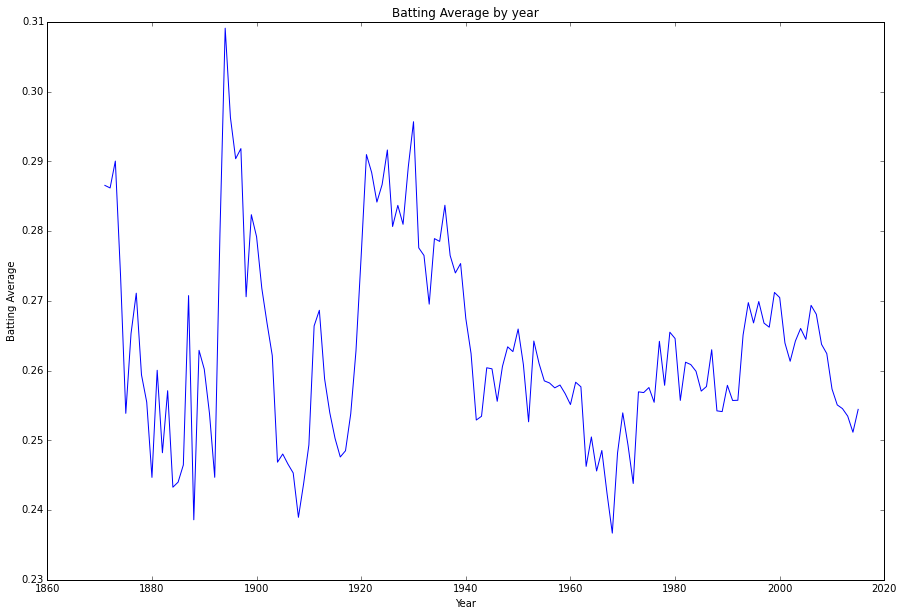

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt

yearly_data = batting_data.groupby('year')
yearly_averages = np.empty([len(yearly_data), 2])
for idx, (year, data) in enumerate(yearly_data):
    yearly_averages[idx] = [year, data['h'].sum() / data['ab'].sum()]
plt.figure(figsize=[15,10])
plt.plot(yearly_averages[:, 0], yearly_averages[:, 1])
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.title('Batting Average by year')
plt.show()

Why were batting averages so high in the 1890s and 1920s??

The average in 1894 was .309! This can be partially attributed to the unbelievable season that the Philadelphia Phillies had, with an average of .350. Five players throughout the league hit over .400, four of them from the Phillies! The other major factor was the change in distance of the pitcher's mound. Originally 50' away, the mound was pushed back to 60'6", giving hitters more time to determine the type of pitch and the intended location.

1900-1920 is considered the [deadball era](https://en.wikipedia.org/wiki/Dead-ball_era). The following all contributed to low scoring games:
    * Fouls were now considered strikes
    * One ball was used for most of the game, making it harder to hit as it became scuffed and warped.
    * Spitballs weren't banned until 1921

Finally in the 1920s, some changes gave more advantages to the hitter:
    * Illegal pitches were banned
    * More baseballs were used per game, where any warped or heavily scuffed balls were removed

The 1920s also had some of the greatest hitters of all time, such as Babe Ruth, Lou Geghrig, Mickey Cochrane, Jimmie Foxx, Rogers Hornsby, Mel Ott, etc...

Let's look at pitcher data now and plot the strikeouts per years to see if there are any trends.

_ Plot how the number of strikeouts has changed throughout the years._

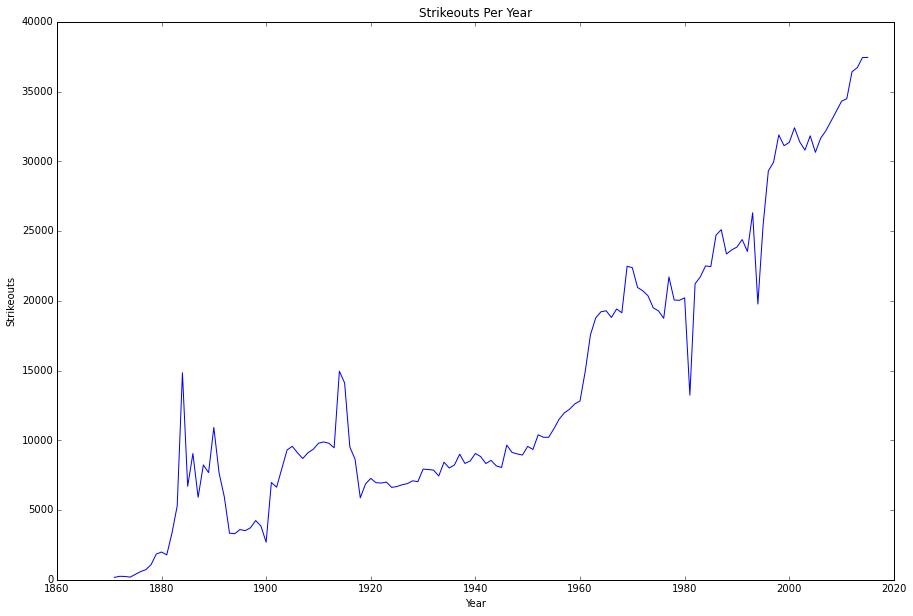

In [150]:
pitching_data = pd.read_csv('baseball/pitching.csv')

pitching_data_per_year = pitching_data.groupby('year')
strikeouts_per_year = np.empty([len(pitching_data_per_year), 2])
for i, (year, data) in enumerate(pitching_data_per_year):
    strikeouts_per_year[i] = [year, sum(data['so'])]

plt.figure(figsize=[15,10])
plt.plot(strikeouts_per_year[:, 0], strikeouts_per_year[:, 1])
plt.xlabel('Year')
plt.ylabel('Strikeouts')
plt.title('Strikeouts Per Year')
plt.show()

This general upward trend follows the changes in the rules to the game, the number of games played, and the switch from baseball being a hitter's game to more of a pitcher's game.

Some rule changes:

* The mound moved 10 feet back in the 1890s, thus completely changing the game for pitchers who needed an adjustment period. This can account for the sharp decline of strikeouts.
* Fouls being considered strikes
* Pitchers no longer being able to scuff the balls
* Physical changes to the baseball

General Changes to the game:

* In 1962, teams in both leagues began playing 162 games instead of 154.
* The number of teams has steadily increased throughout the years, thus increasing the overall number of games played each season.

# For Fun

_ What player's name contains all the letters of either a historical or current team's name, including the city or state? For example, if there ever were a player named Tom Christopher Newkresy, his name contains the correct letters to spell New York Mets. _

In [155]:
import re

# Load data
all_teams = pd.read_csv('baseball/team_franchise.csv')['franchise_name']
all_players = (player_data['name_first'] + player_data['name_last']).dropna()

# Remove non letter characters and duplicate team and player names
all_teams = [re.sub("['-. /]", '', k.lower()) for k in set(all_teams.values)]
all_players = [re.sub("[. ']", '', k.lower()) for k in set(all_players.values)]
players = []
for player in all_players:
    for team in all_teams:
        if len(player) < len(team):
            continue
        temp_player = player
        n = True
        for t in team:
            idx = temp_player.find(t)
            if idx == -1:
                n = False
                break
            temp_player = temp_player[:idx] + temp_player[idx+1:]
        if n == True:
            players.append([player, team])
print players

[['odrisamerdespaigne', 'sandiegopadres']]
